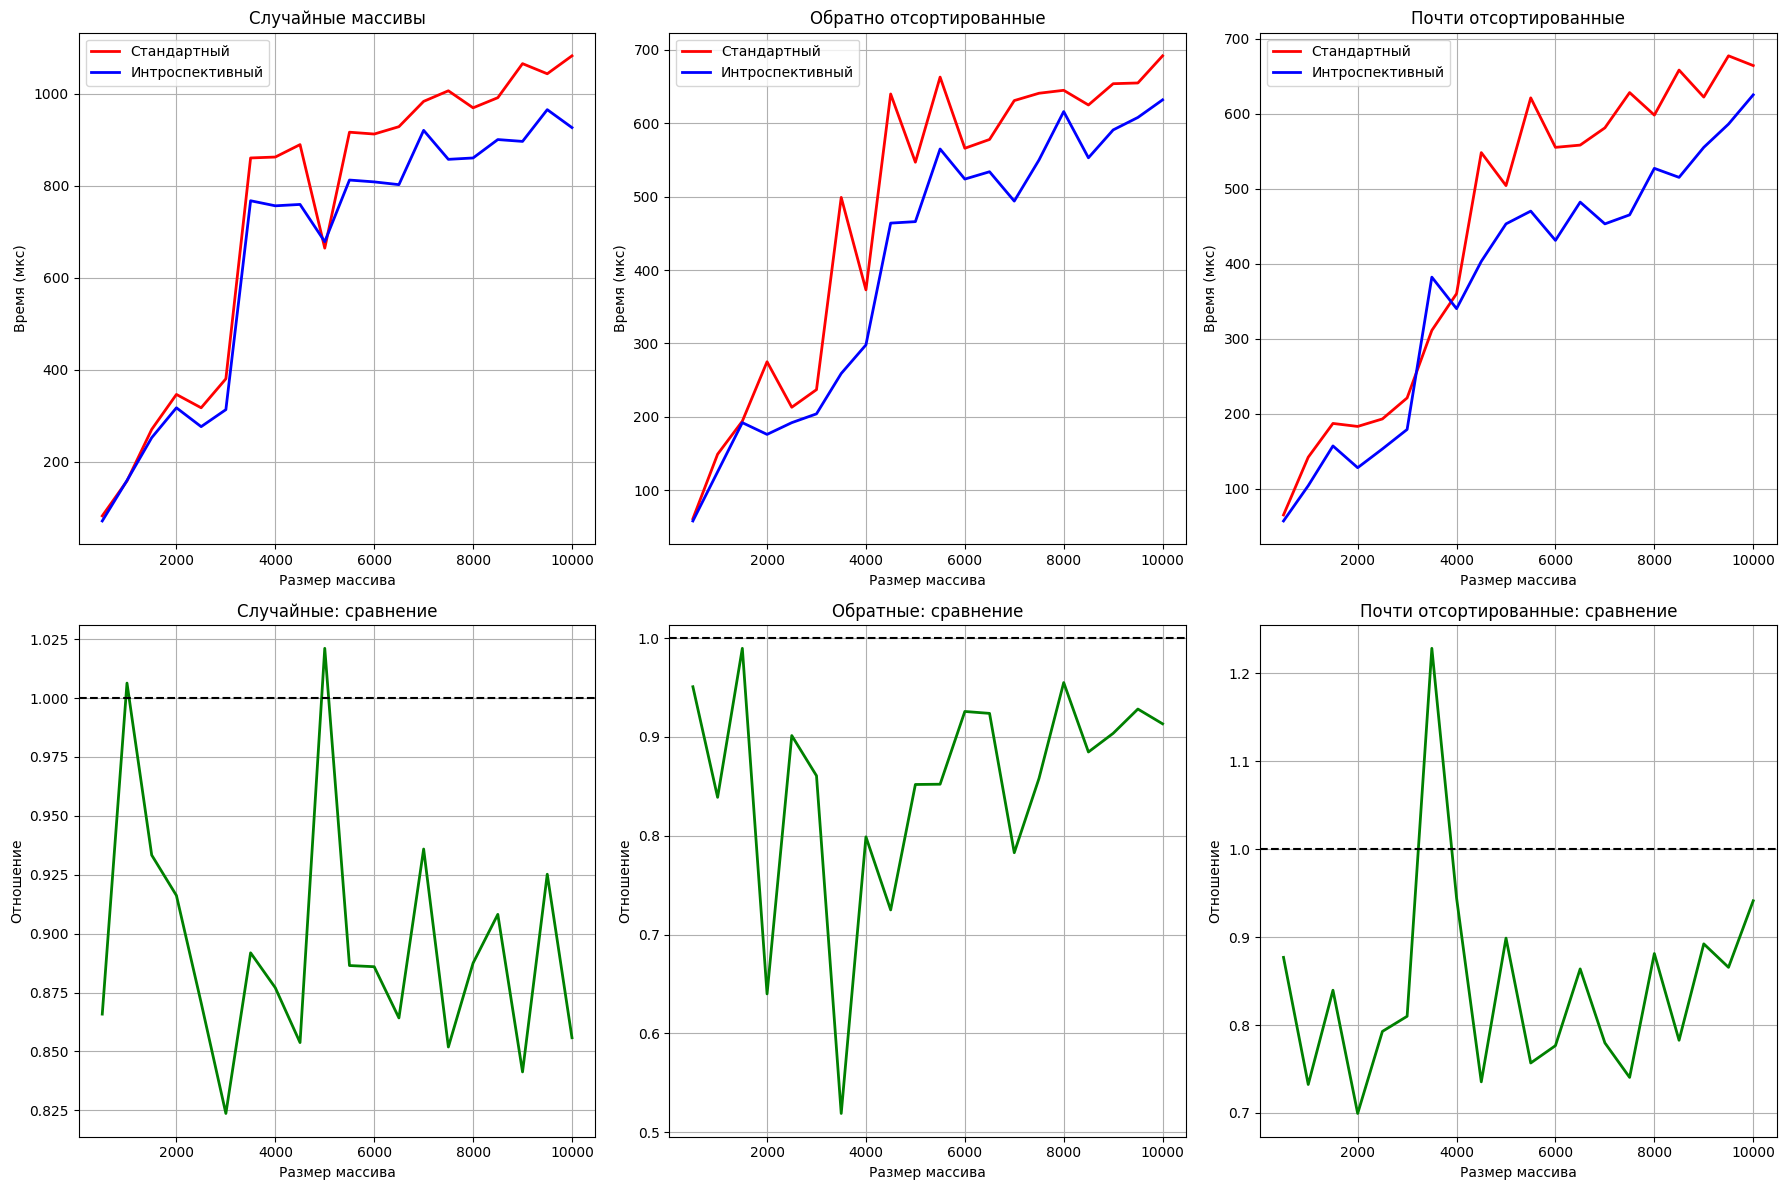

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import io


# это данные скопированные из консоли при запуске алгоритма в c++
data = """
500,82,71,61,58,65,57
1000,158,159,149,125,142,104
1500,270,252,194,192,187,157
2000,346,317,275,176,183,128
2500,317,276,213,192,193,153
3000,380,313,237,204,221,179
3500,860,767,499,259,311,382
4000,862,756,373,298,360,340
4500,889,759,640,464,548,403
5000,664,678,547,466,504,453
5500,916,812,663,565,621,470
6000,912,808,566,524,555,431
6500,928,802,578,534,558,482
7000,983,920,631,494,581,453
7500,1006,857,641,550,628,465
8000,969,860,645,616,598,527
8500,991,900,625,553,658,515
9000,1065,896,654,591,622,555
9500,1043,965,655,608,677,586
10000,1082,926,692,632,664,625
"""

def main():
    df = pd.read_csv(io.StringIO(data),
                     names=['Size', 'Random_Classic', 'Random_Intro',
                            'Reverse_Classic', 'Reverse_Intro',
                            'Almost_Classic', 'Almost_Intro'])

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    axes[0,0].plot(df['Size'], df['Random_Classic'], 'r-', label='Стандартный', linewidth=2)
    axes[0,0].plot(df['Size'], df['Random_Intro'], 'b-', label='Интроспективный', linewidth=2)
    axes[0,0].set_xlabel('Размер массива')
    axes[0,0].set_ylabel('Время (мкс)')
    axes[0,0].set_title('Случайные массивы')
    axes[0,0].legend()
    axes[0,0].grid(True)

    axes[0,1].plot(df['Size'], df['Reverse_Classic'], 'r-', label='Стандартный', linewidth=2)
    axes[0,1].plot(df['Size'], df['Reverse_Intro'], 'b-', label='Интроспективный', linewidth=2)
    axes[0,1].set_xlabel('Размер массива')
    axes[0,1].set_ylabel('Время (мкс)')
    axes[0,1].set_title('Обратно отсортированные')
    axes[0,1].legend()
    axes[0,1].grid(True)

    axes[0,2].plot(df['Size'], df['Almost_Classic'], 'r-', label='Стандартный', linewidth=2)
    axes[0,2].plot(df['Size'], df['Almost_Intro'], 'b-', label='Интроспективный', linewidth=2)
    axes[0,2].set_xlabel('Размер массива')
    axes[0,2].set_ylabel('Время (мкс)')
    axes[0,2].set_title('Почти отсортированные')
    axes[0,2].legend()
    axes[0,2].grid(True)

    axes[1,0].plot(df['Size'], df['Random_Intro']/df['Random_Classic'], 'g-', linewidth=2)
    axes[1,0].axhline(y=1.0, color='black', linestyle='--')
    axes[1,0].set_xlabel('Размер массива')
    axes[1,0].set_ylabel('Отношение')
    axes[1,0].set_title('Случайные: сравнение')
    axes[1,0].grid(True)

    axes[1,1].plot(df['Size'], df['Reverse_Intro']/df['Reverse_Classic'], 'g-', linewidth=2)
    axes[1,1].axhline(y=1.0, color='black', linestyle='--')
    axes[1,1].set_xlabel('Размер массива')
    axes[1,1].set_ylabel('Отношение')
    axes[1,1].set_title('Обратные: сравнение')
    axes[1,1].grid(True)

    axes[1,2].plot(df['Size'], df['Almost_Intro']/df['Almost_Classic'], 'g-', linewidth=2)
    axes[1,2].axhline(y=1.0, color='black', linestyle='--')
    axes[1,2].set_xlabel('Размер массива')
    axes[1,2].set_ylabel('Отношение')
    axes[1,2].set_title('Почти отсортированные: сравнение')
    axes[1,2].grid(True)

    plt.tight_layout()
    plt.savefig('algorithms_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

if __name__ == "__main__":
    main()

Из графиков видно:

Случайные массивы:
На случайных данных оба алгоритма работают хорошо, так как QuickSort эффективен при случайном распределении. IntroSort добавляет небольшие накладные расходы на проверки, но выигрывает за счет InsertionSort на малых подмассивах. IntroSort быстрее на малых и больших размерах, в среднем диапазоне оба алгоритма работают примерно одинаково.

Обратно отсортированные массивы:
Это худший случай для QuickSort - он выполняется за O(n²). IntroSort вовремя переключается на HeapSort, сохраняя O(n log n), поэтому IntroSort значительно быстрее на всех размерах.

Почти отсортированные массивы:
InsertionSort в IntroSort хорошо работает на почти упорядоченных данных, но иногда случайный выбор опоры в QuickSort дает лучший баланс разделения.

IntroSort превосходит на сложных случаях и дает сравнимую производительность на обычных данных.

Из графиков видно:

Случайные массивы:
IntroSort имеет преимущество над классическим QuickSort для всех размеров массивов. Отношение времени выполнения остается ниже единицы.

Обратно отсортированные массивы:
Наиболее заметное преимущество IntroSort наблюдается на обратно отсортированных данных. Механизм переключения на HeapSort при глубине рекурсии 2*log₂N исключает квадратичную сложность.

Почти отсортированные массивы: IntroSort сохраняет преимущество благодаря использованию InsertionSort для малых подмассивов (<16 элементов).

=> IntroSort превосходит QuickSort на всех типах данных. Преимущество растет с размером массива (от 5000 тысяч элементов превосходит везде).